<a href="https://colab.research.google.com/github/WaterPurify/Text_Mining/blob/main/%EC%95%84%EA%B3%A0%EB%8B%A4_%EB%A6%AC%EB%B7%B0_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%A7%88%EC%9D%B4%EB%8B%9D_EDA_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기 & 합치기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 한글 지원 라이브러리 설치
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# path = '/content/'
# d1 = pd.read_csv(path + '아고다크롤링_리뷰랑날짜.csv')
# d2 = pd.read_csv(path + '아고다크롤링_국적객실유형.csv')
# d3 = pd.read_csv(path + '아고다크롤링_평점이랑여행유형.csv')

# # 데이터프레임을 열 방향으로 합치기
# df = pd.concat([d1, d2, d3], axis=1)

path = '/content/아고다최종리뷰데이터.csv'
df=pd.read_csv(path)

df


,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla
...,...,...,...,...,...,...,...,...,...
1960,"Exceptional”\n나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는...",Stayed 29 nights in April 2023,9.6,Solo traveler,Exceptional”,"Reviewed May 03, 2023",Whan from United States,Standard Twin,seoul_riverside
1961,"위치, 서비스 청결함 다 좋네요”\n위치도 좋고 서비스도 좋았구요 객실 컨디션까지 ...",Stayed 2 nights in March 2023,10.0,Couple,"위치, 서비스 청결함 다 좋네요”","Reviewed April 18, 2023",jo from South Korea,Deluxe Double,seoul_riverside
1962,친절한 직원”\n체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,Stayed 2 nights in July 2023,10.0,Business traveler,친절한 직원”,"Reviewed July 21, 2023",CHUL from South Korea,Deluxe Double,seoul_riverside
1963,Exceptional”\n서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통...,Stayed 1 night in July 2023,9.6,Couple,Exceptional”,"Reviewed July 08, 2023",Yumi from South Korea,Standard Twin,seoul_riverside


In [ ]:
df.shape

(1965, 9)

In [ ]:
df.review_content.unique()

array(["Our child's first flight trip was to Jeju, and Shilla Hotel was the truth”\nOur child who loves swimming really enjoyed the part where the indoor and outdoor swimming pools were connected (continuously going back and forth between the two). The outdoor swimming pool had a warm jacuzzi, sauna, and sunbeds that made us forget about the cold rain, and towels and robes were provided without any shortage, which was satisfying. The breakfast buffet was somewhat ordinary, but the dinner buffet was a feast of numerous main dishes that made us want to eat until we were full (it was a bit disappointing that the only drink our child could have was water, and juice had to be ordered for an additional fee). The kindness of the staff was the best of the best, regardless of department, such as front desk, F&B, and housekeeping. Shilla Hotel was the highlight of our child's first airplane ride and first trip to Jeju, and we came back from a pleasant trip wanting to visit again.",
       "Relax

In [ ]:
len(df.review_content.unique())

1963

In [ ]:
# 중복된 값 제거
unique_values = df.drop_duplicates(subset=['review_content'])

unique_values

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla
...,...,...,...,...,...,...,...,...,...
1960,"Exceptional”\n나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는...",Stayed 29 nights in April 2023,9.6,Solo traveler,Exceptional”,"Reviewed May 03, 2023",Whan from United States,Standard Twin,seoul_riverside
1961,"위치, 서비스 청결함 다 좋네요”\n위치도 좋고 서비스도 좋았구요 객실 컨디션까지 ...",Stayed 2 nights in March 2023,10.0,Couple,"위치, 서비스 청결함 다 좋네요”","Reviewed April 18, 2023",jo from South Korea,Deluxe Double,seoul_riverside
1962,친절한 직원”\n체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,Stayed 2 nights in July 2023,10.0,Business traveler,친절한 직원”,"Reviewed July 21, 2023",CHUL from South Korea,Deluxe Double,seoul_riverside
1963,Exceptional”\n서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통...,Stayed 1 night in July 2023,9.6,Couple,Exceptional”,"Reviewed July 08, 2023",Yumi from South Korea,Standard Twin,seoul_riverside


In [ ]:
unique_values.isna().sum()

review_content        0
date_text             0
review_score          0
group                 1
review_title          0
write_date            0
reviewer_country      0
room_type           389
hotel                 0
dtype: int64

In [ ]:
unique_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1963 entries, 0 to 1964
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_content    1963 non-null   object 
 1   date_text         1963 non-null   object 
 2   review_score      1963 non-null   float64
 3   group             1962 non-null   object 
 4   review_title      1963 non-null   object 
 5   write_date        1963 non-null   object 
 6   reviewer_country  1963 non-null   object 
 7   room_type         1574 non-null   object 
 8   hotel             1963 non-null   object 
dtypes: float64(1), object(8)
memory usage: 153.4+ KB


In [ ]:
unique_values.describe()

,review_score
count,1963.000000
mean,8.268823
std,1.821492
min,2.000000
25%,7.200000
50%,8.800000
75%,10.000000
max,10.000000


## 데이터 전처리

###date_text에서 몇박을 묵었는지, 숙박 연월 추출





In [ ]:
 month_map = { 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

In [ ]:
def stay_date(review):
    text = str(review)
    month, year = text.split('in ')[1].split(' ')[-2:]
    month = month_map.get(month)
    date= f"{year}-{month:02d}"
    return date

unique_values['stay_date'] = unique_values['date_text'].apply(stay_date)
unique_values['stay_date'] = pd.to_datetime(unique_values['stay_date'])
unique_values

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01
...,...,...,...,...,...,...,...,...,...,...
1960,"Exceptional”\n나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는...",Stayed 29 nights in April 2023,9.6,Solo traveler,Exceptional”,"Reviewed May 03, 2023",Whan from United States,Standard Twin,seoul_riverside,2023-04-01
1961,"위치, 서비스 청결함 다 좋네요”\n위치도 좋고 서비스도 좋았구요 객실 컨디션까지 ...",Stayed 2 nights in March 2023,10.0,Couple,"위치, 서비스 청결함 다 좋네요”","Reviewed April 18, 2023",jo from South Korea,Deluxe Double,seoul_riverside,2023-03-01
1962,친절한 직원”\n체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,Stayed 2 nights in July 2023,10.0,Business traveler,친절한 직원”,"Reviewed July 21, 2023",CHUL from South Korea,Deluxe Double,seoul_riverside,2023-07-01
1963,Exceptional”\n서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통...,Stayed 1 night in July 2023,9.6,Couple,Exceptional”,"Reviewed July 08, 2023",Yumi from South Korea,Standard Twin,seoul_riverside,2023-07-01


In [ ]:
def date_extract(review):
    text = str(review)
    stay = int(text.split('Stayed ')[1].split(' ')[0])
    return stay

unique_values['stay'] = unique_values['date_text'].apply(date_extract)
unique_values

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2
...,...,...,...,...,...,...,...,...,...,...,...
1960,"Exceptional”\n나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는...",Stayed 29 nights in April 2023,9.6,Solo traveler,Exceptional”,"Reviewed May 03, 2023",Whan from United States,Standard Twin,seoul_riverside,2023-04-01,29
1961,"위치, 서비스 청결함 다 좋네요”\n위치도 좋고 서비스도 좋았구요 객실 컨디션까지 ...",Stayed 2 nights in March 2023,10.0,Couple,"위치, 서비스 청결함 다 좋네요”","Reviewed April 18, 2023",jo from South Korea,Deluxe Double,seoul_riverside,2023-03-01,2
1962,친절한 직원”\n체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,Stayed 2 nights in July 2023,10.0,Business traveler,친절한 직원”,"Reviewed July 21, 2023",CHUL from South Korea,Deluxe Double,seoul_riverside,2023-07-01,2
1963,Exceptional”\n서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통...,Stayed 1 night in July 2023,9.6,Couple,Exceptional”,"Reviewed July 08, 2023",Yumi from South Korea,Standard Twin,seoul_riverside,2023-07-01,1


###reviewer_country에서 from 기준으로 리뷰자 국적 추출

In [ ]:
import re

Result = []
#어느 나라에서 리뷰가 온다는 것을 따로 review_country로 만들어줌
for index, row in unique_values.iterrows():
    result = re.search(r'from\s+(.+)', str(row['reviewer_country']))
    if result:
        Result.append((result.group(1)))
    else:
        Result.append(None)

unique_values['Country'] = Result
unique_values

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay,Country
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3,South Korea
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2,South Korea
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2,Indonesia
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2,South Korea
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
1960,"Exceptional”\n나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는...",Stayed 29 nights in April 2023,9.6,Solo traveler,Exceptional”,"Reviewed May 03, 2023",Whan from United States,Standard Twin,seoul_riverside,2023-04-01,29,United States
1961,"위치, 서비스 청결함 다 좋네요”\n위치도 좋고 서비스도 좋았구요 객실 컨디션까지 ...",Stayed 2 nights in March 2023,10.0,Couple,"위치, 서비스 청결함 다 좋네요”","Reviewed April 18, 2023",jo from South Korea,Deluxe Double,seoul_riverside,2023-03-01,2,South Korea
1962,친절한 직원”\n체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,Stayed 2 nights in July 2023,10.0,Business traveler,친절한 직원”,"Reviewed July 21, 2023",CHUL from South Korea,Deluxe Double,seoul_riverside,2023-07-01,2,South Korea
1963,Exceptional”\n서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통...,Stayed 1 night in July 2023,9.6,Couple,Exceptional”,"Reviewed July 08, 2023",Yumi from South Korea,Standard Twin,seoul_riverside,2023-07-01,1,South Korea


In [ ]:
def remove_newline(text):
    # 문자열에서 '\n'을 제거하고 반환
    return text.replace('\n', '')


unique_values['cleaned_review'] = unique_values['review_content'].apply(remove_newline)
unique_values

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay,Country,cleaned_review
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3,South Korea,"Our child's first flight trip was to Jeju, and..."
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2,South Korea,Relaxing Trip”I came for a healing trip and th...
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2,Indonesia,AMAZING view and excellent service ”This hotel...
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2,South Korea,"Worth every penny”Room is spacious, clean and ..."
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2,United States,Amazing grounds”The grounds and garden are sim...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,"Exceptional”\n나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는...",Stayed 29 nights in April 2023,9.6,Solo traveler,Exceptional”,"Reviewed May 03, 2023",Whan from United States,Standard Twin,seoul_riverside,2023-04-01,29,United States,"Exceptional”나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는데,..."
1961,"위치, 서비스 청결함 다 좋네요”\n위치도 좋고 서비스도 좋았구요 객실 컨디션까지 ...",Stayed 2 nights in March 2023,10.0,Couple,"위치, 서비스 청결함 다 좋네요”","Reviewed April 18, 2023",jo from South Korea,Deluxe Double,seoul_riverside,2023-03-01,2,South Korea,"위치, 서비스 청결함 다 좋네요”위치도 좋고 서비스도 좋았구요 객실 컨디션까지 다 ..."
1962,친절한 직원”\n체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,Stayed 2 nights in July 2023,10.0,Business traveler,친절한 직원”,"Reviewed July 21, 2023",CHUL from South Korea,Deluxe Double,seoul_riverside,2023-07-01,2,South Korea,친절한 직원”체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.
1963,Exceptional”\n서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통...,Stayed 1 night in July 2023,9.6,Couple,Exceptional”,"Reviewed July 08, 2023",Yumi from South Korea,Standard Twin,seoul_riverside,2023-07-01,1,South Korea,Exceptional”서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통편이...


###review 길이로 파생 변수 만들기

In [ ]:
unique_values['review_len'] = unique_values['review_content'].apply(len)
unique_values

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay,Country,cleaned_review,review_len
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3,South Korea,"Our child's first flight trip was to Jeju, and...",975
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2,South Korea,Relaxing Trip”I came for a healing trip and th...,359
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2,Indonesia,AMAZING view and excellent service ”This hotel...,181
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2,South Korea,"Worth every penny”Room is spacious, clean and ...",339
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2,United States,Amazing grounds”The grounds and garden are sim...,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,"Exceptional”\n나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는...",Stayed 29 nights in April 2023,9.6,Solo traveler,Exceptional”,"Reviewed May 03, 2023",Whan from United States,Standard Twin,seoul_riverside,2023-04-01,29,United States,"Exceptional”나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는데,...",180
1961,"위치, 서비스 청결함 다 좋네요”\n위치도 좋고 서비스도 좋았구요 객실 컨디션까지 ...",Stayed 2 nights in March 2023,10.0,Couple,"위치, 서비스 청결함 다 좋네요”","Reviewed April 18, 2023",jo from South Korea,Deluxe Double,seoul_riverside,2023-03-01,2,South Korea,"위치, 서비스 청결함 다 좋네요”위치도 좋고 서비스도 좋았구요 객실 컨디션까지 다 ...",109
1962,친절한 직원”\n체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,Stayed 2 nights in July 2023,10.0,Business traveler,친절한 직원”,"Reviewed July 21, 2023",CHUL from South Korea,Deluxe Double,seoul_riverside,2023-07-01,2,South Korea,친절한 직원”체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,44
1963,Exceptional”\n서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통...,Stayed 1 night in July 2023,9.6,Couple,Exceptional”,"Reviewed July 08, 2023",Yumi from South Korea,Standard Twin,seoul_riverside,2023-07-01,1,South Korea,Exceptional”서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통편이...,136


#영어로 통일

데이터 분석 결과 영어,한국어,스페인어 등 많은 언어들이 존재함
 -토큰화 하기 전에 영어로 통일하는 것이 필요함



In [ ]:
#Landetect를 통해서 일단 다른 언어인지 분류하는것 필요함
!pip install langdetect

In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(text):
    try:
        language = detect(text)
        return language
    except LangDetectException as e:
        print("Error:", e)
        return None


for index, row in unique_values.iterrows():
    lang = row['cleaned_review']
    language = detect_language(lang)
    if language:
        unique_values.at[index, 'language'] = language
    else:
        continue



unique_values

Error: No features in text.
Error: No features in text.
Error: No features in text.


,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay,Country,cleaned_review,review_len,language
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3,South Korea,"Our child's first flight trip was to Jeju, and...",975,en
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2,South Korea,Relaxing Trip”I came for a healing trip and th...,359,en
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2,Indonesia,AMAZING view and excellent service ”This hotel...,181,en
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2,South Korea,"Worth every penny”Room is spacious, clean and ...",339,en
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2,United States,Amazing grounds”The grounds and garden are sim...,95,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,"Exceptional”\n나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는...",Stayed 29 nights in April 2023,9.6,Solo traveler,Exceptional”,"Reviewed May 03, 2023",Whan from United States,Standard Twin,seoul_riverside,2023-04-01,29,United States,"Exceptional”나혼자 한달을 지냈고, 처음에는 조금 방이 적은 것 같았는데,...",180,ko
1961,"위치, 서비스 청결함 다 좋네요”\n위치도 좋고 서비스도 좋았구요 객실 컨디션까지 ...",Stayed 2 nights in March 2023,10.0,Couple,"위치, 서비스 청결함 다 좋네요”","Reviewed April 18, 2023",jo from South Korea,Deluxe Double,seoul_riverside,2023-03-01,2,South Korea,"위치, 서비스 청결함 다 좋네요”위치도 좋고 서비스도 좋았구요 객실 컨디션까지 다 ...",109,ko
1962,친절한 직원”\n체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,Stayed 2 nights in July 2023,10.0,Business traveler,친절한 직원”,"Reviewed July 21, 2023",CHUL from South Korea,Deluxe Double,seoul_riverside,2023-07-01,2,South Korea,친절한 직원”체크인때 항상 밝은 미소로 맞이해주시는 여자 지배인님 감사합니다.,44,ko
1963,Exceptional”\n서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통...,Stayed 1 night in July 2023,9.6,Couple,Exceptional”,"Reviewed July 08, 2023",Yumi from South Korea,Standard Twin,seoul_riverside,2023-07-01,1,South Korea,Exceptional”서울 갈 때마다 객실이 있으면 묵는 숙소인데 깨끗하고 교통편이...,136,ko


In [ ]:
English_sentences = unique_values[unique_values['language']=='en']
English_sentences

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay,Country,cleaned_review,review_len,language
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3,South Korea,"Our child's first flight trip was to Jeju, and...",975,en
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2,South Korea,Relaxing Trip”I came for a healing trip and th...,359,en
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2,Indonesia,AMAZING view and excellent service ”This hotel...,181,en
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2,South Korea,"Worth every penny”Room is spacious, clean and ...",339,en
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2,United States,Amazing grounds”The grounds and garden are sim...,95,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,Brand new hotel surrounded by construction sit...,Stayed 4 nights in November 2015,7.3,Family with young children,Brand new hotel surrounded by construction sites”,"Reviewed November 26, 2015",Eric from Singapore,NaN,seoul_riverside,2015-11-01,4,Singapore,Brand new hotel surrounded by construction sit...,472,en
1810,All good ”\nOverall a good hotel. It has an el...,Stayed 2 nights in March 2024,9.2,Business traveler,All good ”,"Reviewed March 03, 2024","Shing from Hong Kong SAR, China",Deluxe Double,seoul_riverside,2024-03-01,2,"Hong Kong SAR, China",All good ”Overall a good hotel. It has an elev...,731,en
1811,Great place for a stayover”\nCompact clean roo...,Stayed 1 night in October 2023,10.0,Couple,Great place for a stayover”,"Reviewed October 13, 2023",Ben from Netherlands,Standard Twin,seoul_riverside,2023-10-01,1,Netherlands,"Great place for a stayover”Compact clean room,...",218,en
1840,"Close to station, chill neighborhood”\nVery cl...",Stayed 1 night in August 2023,8.0,Solo traveler,"Close to station, chill neighborhood”","Reviewed September 01, 2023",WAIYAN from Japan,Deluxe Double,seoul_riverside,2023-08-01,1,Japan,"Close to station, chill neighborhood”Very clos...",250,en


In [ ]:
def Extract_number_alphabet(series):
    """
    Extract numbers and words from the given strings

    Parameters:
    series (pandas.Series): Input Series containing strings with symbols.

    Returns:
    pandas.Series: New Series with symbols replaced with spaces.
    """
    extracted_series = series.str.extractall(r'([a-zA-Z0-9]+)').groupby(level=0).agg(' '.join)
    return extracted_series

English_sentences['cleaned_review'] =Extract_number_alphabet(English_sentences['cleaned_review'])
English_sentences

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay,Country,cleaned_review,review_len,language
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3,South Korea,Our child s first flight trip was to Jeju and ...,975,en
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2,South Korea,Relaxing Trip I came for a healing trip and th...,359,en
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2,Indonesia,AMAZING view and excellent service This hotel ...,181,en
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2,South Korea,Worth every penny Room is spacious clean and n...,339,en
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2,United States,Amazing grounds The grounds and garden are sim...,95,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,Brand new hotel surrounded by construction sit...,Stayed 4 nights in November 2015,7.3,Family with young children,Brand new hotel surrounded by construction sites”,"Reviewed November 26, 2015",Eric from Singapore,NaN,seoul_riverside,2015-11-01,4,Singapore,Brand new hotel surrounded by construction sit...,472,en
1810,All good ”\nOverall a good hotel. It has an el...,Stayed 2 nights in March 2024,9.2,Business traveler,All good ”,"Reviewed March 03, 2024","Shing from Hong Kong SAR, China",Deluxe Double,seoul_riverside,2024-03-01,2,"Hong Kong SAR, China",All good Overall a good hotel It has an elevat...,731,en
1811,Great place for a stayover”\nCompact clean roo...,Stayed 1 night in October 2023,10.0,Couple,Great place for a stayover”,"Reviewed October 13, 2023",Ben from Netherlands,Standard Twin,seoul_riverside,2023-10-01,1,Netherlands,Great place for a stayover Compact clean room ...,218,en
1840,"Close to station, chill neighborhood”\nVery cl...",Stayed 1 night in August 2023,8.0,Solo traveler,"Close to station, chill neighborhood”","Reviewed September 01, 2023",WAIYAN from Japan,Deluxe Double,seoul_riverside,2023-08-01,1,Japan,Close to station chill neighborhood Very close...,250,en


NLTK을 이용한 토큰화


*   Naturak Language Toolkit(NLTK)는 자연어 처리를 위해 만들어진 파이썬 라이브러리입니다.
*  NLTK는 word_tokenize()를 통해 단어 토큰화를 할 수 있고 sent_tokenize()를 통해 문장 토큰화를 할 수 있습니다.

In [ ]:
#NLTK 라이브러리 설치
!pip install --user -U nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

from nltk.tokenize import word_tokenize
import numpy as np

def tokenize_text(text):
    return word_tokenize(text)


new_data = []

for index, row in English_sentences.iterrows():
    #소문자로 통일을 함

    tokenized_list = tokenize_text(str(row['cleaned_review']).lower())
    new_data.append(tokenized_list)

  # 원래 DataFrame을 복사하여 새로운 DataFrame 생성
English_sentences['tokenized_list'] = new_data
English_sentences

,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay,Country,cleaned_review,review_len,language,tokenized_list
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3,South Korea,Our child s first flight trip was to Jeju and ...,975,en,"[our, child, s, first, flight, trip, was, to, ..."
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2,South Korea,Relaxing Trip I came for a healing trip and th...,359,en,"[relaxing, trip, i, came, for, a, healing, tri..."
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2,Indonesia,AMAZING view and excellent service This hotel ...,181,en,"[amazing, view, and, excellent, service, this,..."
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2,South Korea,Worth every penny Room is spacious clean and n...,339,en,"[worth, every, penny, room, is, spacious, clea..."
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2,United States,Amazing grounds The grounds and garden are sim...,95,en,"[amazing, grounds, the, grounds, and, garden, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,Brand new hotel surrounded by construction sit...,Stayed 4 nights in November 2015,7.3,Family with young children,Brand new hotel surrounded by construction sites”,"Reviewed November 26, 2015",Eric from Singapore,NaN,seoul_riverside,2015-11-01,4,Singapore,Brand new hotel surrounded by construction sit...,472,en,"[brand, new, hotel, surrounded, by, constructi..."
1810,All good ”\nOverall a good hotel. It has an el...,Stayed 2 nights in March 2024,9.2,Business traveler,All good ”,"Reviewed March 03, 2024","Shing from Hong Kong SAR, China",Deluxe Double,seoul_riverside,2024-03-01,2,"Hong Kong SAR, China",All good Overall a good hotel It has an elevat...,731,en,"[all, good, overall, a, good, hotel, it, has, ..."
1811,Great place for a stayover”\nCompact clean roo...,Stayed 1 night in October 2023,10.0,Couple,Great place for a stayover”,"Reviewed October 13, 2023",Ben from Netherlands,Standard Twin,seoul_riverside,2023-10-01,1,Netherlands,Great place for a stayover Compact clean room ...,218,en,"[great, place, for, a, stayover, compact, clea..."
1840,"Close to station, chill neighborhood”\nVery cl...",Stayed 1 night in August 2023,8.0,Solo traveler,"Close to station, chill neighborhood”","Reviewed September 01, 2023",WAIYAN from Japan,Deluxe Double,seoul_riverside,2023-08-01,1,Japan,Close to station chill neighborhood Very close...,250,en,"[close, to, station, chill, neighborhood, very..."


#불용어 제거(Stopwords)



* 갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요

* 큰 의미가 없다라는 것: 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들

* 예를 들면, I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우가 있습니다. 이러한 단어들을 불용어(stopword)라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의

* 물론 불용어는 개발자가 직접 정의할 수도 있습니다

## Gensim에서 불용어 확인하기

*영어의 불용어를 확인하여 저희의 데이터에 최적화하는 작업이 필요함

*다양한 불용어 package가 존재합니다. 하지만 Gensim dictionary가 가장 많은 불용어를 가지고 있습니다.

In [ ]:
#Gensim stopwords 와 개수
stopwords_Gensim =['twelve', 'yourselves', 'nor', 'con', 'here', 'our', 'whatever', 'mine', 'then', 'down', 'between', 'everyone', 'eg', 'just', 'yours', 'bill', 'none', 'inc', 'itself', 'be', 'because', 'hereupon', 'toward', 'me', 'six', 'some', 'noone', 'herself', 'in', 'above', 'make', 'thru', 'whereas', 'those', 'hence', 'himself', 'them', 'unless', 'yet', 'couldnt', 'last', 'under', 'he', 'somehow', 'or', 'neither', 'five', 'thereupon', 'part', 'two', 'full', 'using', 'up', 'really', 'wherever', 'as', 'front', 'back', 'nine', 'otherwise', 'sometime', 'after', 'seem', 'someone', 'anything', 'did', 'am', 'towards', 'whom', 'across', 'from', 'whence', 'less', 'wherein', 'have', 'four', 'quite', 'without', 'per', 'and', 'its', 'didn', 'been', 'hereafter', 'before', 'interest', 'please', 'seems', 'nowhere', 'very', 'well', 'but', 'whereafter', 'cannot', 'amongst', 'must', 'namely', 'few', 'hundred', 'behind', 'others', 'whenever', 'serious', 'among', 'even', 're', 'moreover', 'upon', 'of', 'him', 'anyway', 'show', 'alone', 'call', 'to', 'keep', 'since', 'still', 'onto', 'doesn', 'other', 'too', 'un', 'would', 'if', 'describe', 'next', 'had', 'along', 'fire', 'go', 'all', 'my', 'afterwards', 'this', 'so', 'has', 'further', 'seeming', 'sometimes', 'why', 'were', 'there', 'thereby', 'least', 'again', 'they', 'almost', 'several', 'top', 'ltd', 'than', 'another', 'enough', 'beforehand', 'at', 'else', 'get', 'becoming', 'for', 'an', 'various', 'ten', 'nevertheless', 'etc', 'throughout', 'latterly', 'ie', 'mostly', 'don', 'amoungst', 'beyond', 'beside', 'same', 'such', 'nobody', 'below', 'may', 'can', 'thence', 'about', 'out', 'cant', 'that', 'much', 'used', 'perhaps', 'already', 'indeed', 'detail', 'computer', 'does', 'should', 'take', 'which', 'yourself', 'hasnt', 'every', 'also', 'being', 'although', 'thick', 'whereupon', 'name', 'doing', 'each', 'fifteen', 'thereafter', 'with', 'only', 'ever', 'see', 'most', 'own', 'formerly', 'rather', 'de', 'you', 'us', 'she', 'we', 'km', 'when', 'during', 'eleven', 'however', 'regarding', 'against', 'first', 'are', 'together', 'once', 'on', 'often', 'always', 'whether', 'becomes', 'not', 'became', 'anywhere', 'though', 'was', 'sixty', 'who', 'the', 'co', 'besides', 'any', 'never', 'give', 'former', 'around', 'both', 'amount', 'more', 'themselves', 'one', 'empty', 'thin', 'whose', 'by', 'whither', 'could', 'will', 'find', 'whole', 'hers', 'say', 'therefore', 'hereby', 'fill', 'these', 'done', 'through', 'thus', 'her', 'sincere', 'until', 'what', 'might', 'how', 'his', 'latter', 'meanwhile', 'nothing', 'a', 'move', 'side', 'somewhere', 'their', 'is', 'found', 'become', 'elsewhere', 'over', 'ourselves', 'i', 'put', 'no', 'whereby', 'anyone', 'cry', 'eight', 'myself', 'ours', 'everything', 'except', 'forty', 'it', 'your', 'system', 'many', 'off', 'where', 'while', 'within', 'due', 'now', 'third', 'herein', 'twenty', 'whoever', 'into', 'do', 'bottom', 'everywhere', 'something', 'via', 'either', 'fify', 'seemed', 'anyhow', 'three', 'kg', 'therein', 'made', 'mill']


In [ ]:

# 불용어를 제거한 결과를 저장할 리스트 초기화
filtered_data = []
# 각 리스트의 요소에서 불용어를 제거하고 결과를 새로운 리스트에 추가
for sublist,row in English_sentences.iterrows():
    words = row['tokenized_list']

    filtered_sublist = [word for word in words if word not in stopwords_Gensim]
    filtered_data.append(filtered_sublist)

English_sentences['Keywords'] = filtered_data
Total_info = English_sentences.copy()
Total_info['date_text','stay_data','reviewer_country','Country','review_len','language']


,review_content,date_text,review_score,group,review_title,write_date,reviewer_country,room_type,hotel,stay_date,stay,Country,cleaned_review,review_len,language,tokenized_list,Keywords
0,"Our child's first flight trip was to Jeju, and...",Stayed 3 nights in March 2023,10.0,Family with young children,"Our child's first flight trip was to Jeju, and...","Reviewed March 24, 2023",Jonghyoung from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,3,South Korea,Our child s first flight trip was to Jeju and ...,975,en,"[our, child, s, first, flight, trip, was, to, ...","[child, s, flight, trip, jeju, shilla, hotel, ..."
1,Relaxing Trip”\nI came for a healing trip and ...,Stayed 2 nights in March 2023,10.0,Couple,Relaxing Trip”,"Reviewed March 20, 2023",Seo from South Korea,Standard Terrace Double Garden,jeju_shilla,2023-03-01,2,South Korea,Relaxing Trip I came for a healing trip and th...,359,en,"[relaxing, trip, i, came, for, a, healing, tri...","[relaxing, trip, came, healing, trip, room, cl..."
2,AMAZING view and excellent service ”\nThis hot...,Stayed 2 nights in April 2023,10.0,Family with young children,AMAZING view and excellent service ”,"Reviewed May 03, 2023",malco from Indonesia,Standard Double Mountain,jeju_shilla,2023-04-01,2,Indonesia,AMAZING view and excellent service This hotel ...,181,en,"[amazing, view, and, excellent, service, this,...","[amazing, view, excellent, service, hotel, pro..."
3,"Worth every penny”\nRoom is spacious, clean an...",Stayed 2 nights in September 2022,10.0,Couple,Worth every penny”,"Reviewed September 14, 2022",Jake from South Korea,Deluxe Double Ocean,jeju_shilla,2022-09-01,2,South Korea,Worth every penny Room is spacious clean and n...,339,en,"[worth, every, penny, room, is, spacious, clea...","[worth, penny, room, spacious, clean, neat, st..."
4,Amazing grounds”\nThe grounds and garden are s...,Stayed 2 nights in April 2023,10.0,Solo traveler,Amazing grounds”,"Reviewed April 14, 2023",Hannah from United States,Premier Terrace Double Garden,jeju_shilla,2023-04-01,2,United States,Amazing grounds The grounds and garden are sim...,95,en,"[amazing, grounds, the, grounds, and, garden, ...","[amazing, grounds, grounds, garden, simply, be..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,Brand new hotel surrounded by construction sit...,Stayed 4 nights in November 2015,7.3,Family with young children,Brand new hotel surrounded by construction sites”,"Reviewed November 26, 2015",Eric from Singapore,NaN,seoul_riverside,2015-11-01,4,Singapore,Brand new hotel surrounded by construction sit...,472,en,"[brand, new, hotel, surrounded, by, constructi...","[brand, new, hotel, surrounded, construction, ..."
1810,All good ”\nOverall a good hotel. It has an el...,Stayed 2 nights in March 2024,9.2,Business traveler,All good ”,"Reviewed March 03, 2024","Shing from Hong Kong SAR, China",Deluxe Double,seoul_riverside,2024-03-01,2,"Hong Kong SAR, China",All good Overall a good hotel It has an elevat...,731,en,"[all, good, overall, a, good, hotel, it, has, ...","[good, overall, good, hotel, elevator, keycard..."
1811,Great place for a stayover”\nCompact clean roo...,Stayed 1 night in October 2023,10.0,Couple,Great place for a stayover”,"Reviewed October 13, 2023",Ben from Netherlands,Standard Twin,seoul_riverside,2023-10-01,1,Netherlands,Great place for a stayover Compact clean room ...,218,en,"[great, place, for, a, stayover, compact, clea...","[great, place, stayover, compact, clean, room,..."
1840,"Close to station, chill neighborhood”\nVery cl...",Stayed 1 night in August 2023,8.0,Solo traveler,"Close to station, chill neighborhood”","Reviewed September 01, 2023",WAIYAN from Japan,Deluxe Double,seoul_riverside,2023-08-01,1,Japan,Close to station chill neighborhood Very close...,250,en,"[close, to, station, chill, neighborhood, very...","[close, station, chill, neighborhood, close, g..."


In [ ]:
Total_info[['date_text','stay_date','reviewer_country','Country','review_len','language']]

,date_text,stay_date,reviewer_country,Country,review_len,language
0,Stayed 3 nights in March 2023,2023-03-01,Jonghyoung from South Korea,South Korea,975,en
1,Stayed 2 nights in March 2023,2023-03-01,Seo from South Korea,South Korea,359,en
2,Stayed 2 nights in April 2023,2023-04-01,malco from Indonesia,Indonesia,181,en
3,Stayed 2 nights in September 2022,2022-09-01,Jake from South Korea,South Korea,339,en
4,Stayed 2 nights in April 2023,2023-04-01,Hannah from United States,United States,95,en
...,...,...,...,...,...,...
1806,Stayed 4 nights in November 2015,2015-11-01,Eric from Singapore,Singapore,472,en
1810,Stayed 2 nights in March 2024,2024-03-01,"Shing from Hong Kong SAR, China","Hong Kong SAR, China",731,en
1811,Stayed 1 night in October 2023,2023-10-01,Ben from Netherlands,Netherlands,218,en
1840,Stayed 1 night in August 2023,2023-08-01,WAIYAN from Japan,Japan,250,en


In [ ]:
Total_info[['review_content','tokenized_list','Keywords']]

,review_content,tokenized_list,Keywords
0,"Our child's first flight trip was to Jeju, and...","[our, child, s, first, flight, trip, was, to, ...","[child, s, flight, trip, jeju, shilla, hotel, ..."
1,Relaxing Trip”\nI came for a healing trip and ...,"[relaxing, trip, i, came, for, a, healing, tri...","[relaxing, trip, came, healing, trip, room, cl..."
2,AMAZING view and excellent service ”\nThis hot...,"[amazing, view, and, excellent, service, this,...","[amazing, view, excellent, service, hotel, pro..."
3,"Worth every penny”\nRoom is spacious, clean an...","[worth, every, penny, room, is, spacious, clea...","[worth, penny, room, spacious, clean, neat, st..."
4,Amazing grounds”\nThe grounds and garden are s...,"[amazing, grounds, the, grounds, and, garden, ...","[amazing, grounds, grounds, garden, simply, be..."
...,...,...,...
1806,Brand new hotel surrounded by construction sit...,"[brand, new, hotel, surrounded, by, constructi...","[brand, new, hotel, surrounded, construction, ..."
1810,All good ”\nOverall a good hotel. It has an el...,"[all, good, overall, a, good, hotel, it, has, ...","[good, overall, good, hotel, elevator, keycard..."
1811,Great place for a stayover”\nCompact clean roo...,"[great, place, for, a, stayover, compact, clea...","[great, place, stayover, compact, clean, room,..."
1840,"Close to station, chill neighborhood”\nVery cl...","[close, to, station, chill, neighborhood, very...","[close, station, chill, neighborhood, close, g..."


# Word Cloud
TF-IDF와 IDF를 통해 계절별 키워드 추출하여 wordcloud로 분석하였습니다


*   TF-IDF
*   IDF



In [ ]:

#계절별로 따로 keyword 리스트를 만들어 놨습니다.

import pandas as pd

spring =[]
summer = []
fall = []
winter = []
for index, row in Total_info.iterrows():
    month = row['stay_date'].month

    if month in [2, 3, 4]:
        spring.append(row['Keywords'])
    elif month in [5, 6, 7]:
        summer.append(row['Keywords'])
    elif month in [8, 9, 10]:
        fall.append(row['Keywords'])
    else:
        winter.append(row['Keywords'])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# from PIL import Image

# # Keep in mind the background of the image used must be white

# image_example = Image.open('./')

# mask = np.array(image_example)

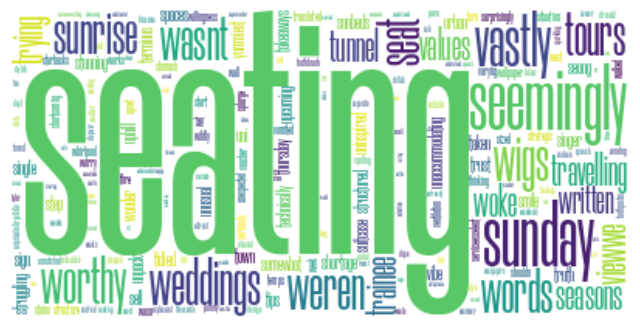

In [ ]:
# 봄 계절에 대한 모든 문서를 하나의 문자열로 결합
spring_corpus = [' '.join(doc) for doc in spring]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(spring_corpus)

# 각 단어와 그에 해당하는 TF-IDF 가중치를 추출
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.sum(axis=0).A1

# 단어와 가중치를 딕셔너리로 변환
word_weights = dict(zip(feature_names, tfidf_values))


# word_weights를 빈도수를 가중치로 사용하는 형태로 변환
word_weights = {word: 1 / weight for word, weight in word_weights.items()}

len(word_weights)

# 10번째 부터의 단어와 가중치
start_index = (len(word_weights)/4)*3
selected_word_freq = {word: weight for i, (word, weight) in enumerate(word_weights.items()) if i >= start_index}

font_path = "/content/Morganite-Medium.ttf"
# 워드클라우드 생성
wordcloud = WordCloud(max_font_size=256 ,
                      random_state = 42 ,
                      stopwords = ['hotel','room','stay'],
                      font_path=font_path,
                      background_color='white').generate_from_frequencies(selected_word_freq)

# 워드클라우드 그리기
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


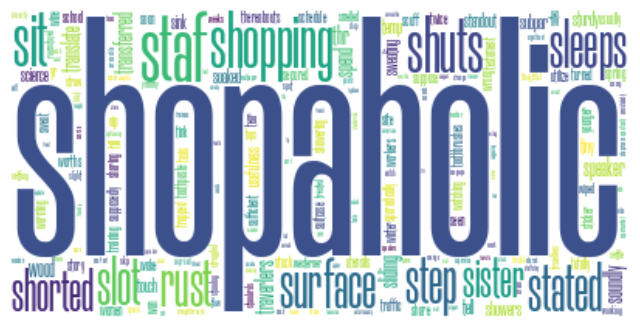

In [ ]:
# 여름 계절에 대한 모든 문서를 하나의 문자열로 결합
summer_corpus = [' '.join(doc) for doc in summer]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(summer_corpus)

# 각 단어와 그에 해당하는 TF-IDF 가중치를 추출
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.sum(axis=0).A1

# 단어와 가중치를 딕셔너리로 변환
word_weights = dict(zip(feature_names, tfidf_values))


# word_weights를 빈도수를 가중치로 사용하는 형태로 변환
word_weights = {word: 1 / weight for word, weight in word_weights.items()}

len(word_weights)

# 10번째 부터의 단어와 가중치
start_index = (len(word_weights))*0.75
selected_word_freq = {word: weight for i, (word, weight) in enumerate(word_weights.items()) if i >= start_index}





font_path = "/content/Morganite-Medium.ttf"
# 워드클라우드 생성
wordcloud = WordCloud(max_font_size=256 ,
                      random_state = 42 ,
                      stopwords = ['hotel','room','stay'],
                      font_path=font_path,
                      background_color='white').generate_from_frequencies(selected_word_freq)

# 워드클라우드 그리기
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

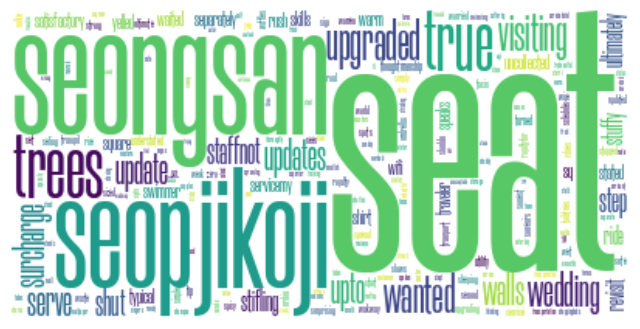

In [ ]:
#가을 계절에 대한 모든 문서를 하나의 문자열로 결합
fall_corpus = [' '.join(doc) for doc in fall]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(fall_corpus)

# 각 단어와 그에 해당하는 TF-IDF 가중치를 추출
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.sum(axis=0).A1

# 단어와 가중치를 딕셔너리로 변환
word_weights = dict(zip(feature_names, tfidf_values))


# word_weights를 빈도수를 가중치로 사용하는 형태로 변환
word_weights = {word: 1 / weight for word, weight in word_weights.items()}

len(word_weights)

# 10번째 부터의 단어와 가중치
start_index = len(word_weights)*0.75
selected_word_freq = {word: weight for i, (word, weight) in enumerate(word_weights.items()) if i >= start_index}


font_path = "/content/Morganite-Medium.ttf"
# 워드클라우드 생성
wordcloud = WordCloud(max_font_size=256 ,
                      random_state = 42 ,
                      stopwords = ['hotel','room','stay'],
                      font_path=font_path,
                      background_color='white').generate_from_frequencies(selected_word_freq)

# 워드클라우드 그리기
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

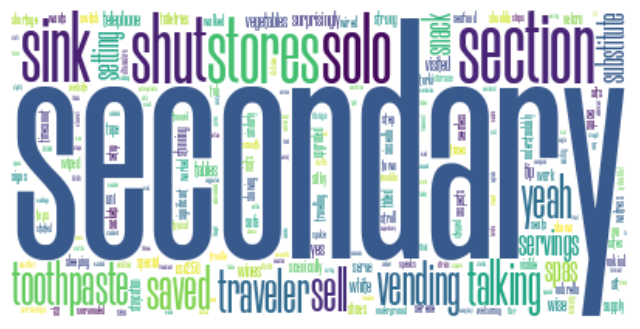

In [ ]:
#겨울 계절에 대한 모든 문서를 하나의 문자열로 결합
winter_corpus = [' '.join(doc) for doc in winter]

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(winter_corpus)

# 각 단어와 그에 해당하는 TF-IDF 가중치를 추출
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.sum(axis=0).A1

# 단어와 가중치를 딕셔너리로 변환
word_weights = dict(zip(feature_names, tfidf_values))


# word_weights를 빈도수를 가중치로 사용하는 형태로 변환
word_weights = {word: 1 / weight for word, weight in word_weights.items()}

len(word_weights)

# 10번째 부터의 단어와 가중치
start_index = len(word_weights)*0.75
selected_word_freq = {word: weight for i, (word, weight) in enumerate(word_weights.items()) if i >= start_index}


font_path = "/content/Morganite-Medium.ttf"
# 워드클라우드 생성
wordcloud = WordCloud(max_font_size=256 ,
                      random_state = 42 ,
                      stopwords = ['hotel','room','stay'],
                      font_path=font_path,
                      background_color='white').generate_from_frequencies(selected_word_freq)

# 워드클라우드 그리기
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
Total = spring_corpus+summer_corpus+fall_corpus+winter_corpus
Total

['child s flight trip jeju shilla hotel truth child loves swimming enjoyed indoor outdoor swimming pools connected continuously going forth outdoor swimming pool warm jacuzzi sauna sunbeds forget cold rain towels robes provided shortage satisfying breakfast buffet somewhat ordinary dinner buffet feast numerous main dishes want eat bit disappointing drink child water juice ordered additional fee kindness staff best best regardless department desk f b housekeeping shilla hotel highlight child s airplane ride trip jeju came pleasant trip wanting visit',
 'relaxing trip came healing trip room clean staff friendly helpful t like carpeted room switched ondol room nice prepared quiet room inner guests crying babies right couldn t sleep crying loud',
 'amazing view excellent service hotel provided best scenery fabulous services satisfied hospitality shown stay',
 'amazing grounds grounds garden simply beautiful kept clean rooms',
 'great stroll ways excellent view offer beach maintained beauti

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer



X = vectorizer.fit_transform(Total)

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (952, 3720)


In [ ]:
# 시각화
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다
!pip install -U pyLDAvis

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
# 모델 객체 생성
lda_model = LatentDirichletAllocation(n_components=20, random_state=777)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# fit transfom
lda_model.fit(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=20, random_state=777)

In [ ]:
# LDA 시각화를 진행해봅시다.
import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(
                        lda_model = lda_model,
                       dtm = X,
                       vectorizer = vectorizer,
                       mds='tsne')
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


리뷰 점수

#CSV 파일로 저장

In [ ]:
Total_info
Total_info.to_csv('Jeju_Shilla_hotel_review.csv',index=False)